In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.drop(columns=['fnlwgt','education','native.country'],inplace=True)

In [4]:
df.shape

(32561, 12)

In [5]:
df.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education.num   32561 non-null  int64 
 3   marital.status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  income          32561 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


In [7]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.head(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
2,66,?,10,Widowed,?,Unmarried,Black,Female,0,4356,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K
7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,>50K
8,68,Federal-gov,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,<=50K
9,41,Private,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,>50K


In [9]:
df.tail(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
32551,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,<=50K
32552,32,Private,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,<=50K
32553,43,Private,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,<=50K
32554,32,Private,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,<=50K
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,>50K
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32560,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [10]:
#check=df[['age']]
#check.isnull().values.any()

In [11]:
#check if there a null values
df.isnull().sum().any()

False

In [12]:
#check duplicate
df.duplicated().any()

True

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
#the most value repeated in the column
df['workclass'].value_counts().idxmax()

'Private'

In [15]:
#replace "?" with "private"
df['workclass'] = df['workclass'].replace('?','Private')

In [16]:
##the most value repeated in the columns
df['occupation'].value_counts().idxmax()

'Prof-specialty'

In [17]:
##replace "?" with "Prof-specialty"
df['occupation'] = df['occupation'].replace('?','Prof-specialty')

In [18]:
df.head(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K
7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,>50K
8,68,Federal-gov,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,<=50K
9,41,Private,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,>50K


In [19]:
df.rename(columns={'education.num':'education_num','marital.status':'marital_status','capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours.per_week'},inplace=True)

In [20]:
df.groupby('income').apply(lambda x: x[x['workclass']==x['workclass'].max()])

age    workclass  education_num      marital_status  \
income                                                              
<=50K  3277    22  Without-pay              9       Never-married   
       3914    65  Without-pay              9  Married-civ-spouse   
       5866    65  Without-pay              4             Widowed   
       12271   19  Without-pay              9       Never-married   
       17760   21  Without-pay              9       Never-married   
...           ...          ...            ...                 ...   
>50K   31151   45    State-gov              9            Divorced   
       31275   45    State-gov             14  Married-civ-spouse   
       31308   51    State-gov             14  Married-civ-spouse   
       31358   67    State-gov             10  Married-civ-spouse   
       32370   36    State-gov             13  Married-civ-spouse   

                     occupation relationship   race     sex  capital_gain  \
income                                                                      
<=50K  3277   Handlers-cleaners    Own-child  White    Male          4416   
       3914    Transport-moving      Husband  White    Male          2414   
       5866     Farming-fishing    Unmarried  White  Female             0   
       12271    Farming-fishing    Own-child  White    Male             0   
       17760       Craft-repair    Own-child  Black    Male             0   
...                         ...          ...    ...     ...           ...   
>50K   31151    Exec-managerial    Unmarried  White  Female             0   
       31275     Prof-specialty      Husband  White    Male             0   
       31308    Exec-managerial      Husband  White    Male             0   
       31358    Protective-serv      Husband  White    Male             0   
       32370       Adm-clerical         Wife  White  Female             0   

              capital_loss  hours.per_week income  
income                                             
<=50K  3277              0              40  <=50K  
       3914              0              20  <=50K  
       5866              0              50  <=50K  
       12271             0              20  <=50K  
       17760             0              40  <=50K  
...                    ...             ...    ...  
>50K   31151             0              38   >50K  
       31275             0              40   >50K  
       31308             0              40   >50K  
       31358             0              41   >50K  
       32370             0              20   >50K  

[360 rows x 12 columns]

In [21]:
#convert workclass column datatype to category datatype
df['workclass']=df['workclass'].astype('category')
print(df['workclass'])

0        Private
1        Private
2        Private
3        Private
4        Private
          ...   
32554    Private
32555    Private
32556    Private
32557    Private
32559    Private
Name: workclass, Length: 28757, dtype: category
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']


In [22]:
le = LabelEncoder()

In [23]:
dfle = df
dfle.workclass = le.fit_transform(dfle.workclass)
dfle.occupation = le.fit_transform(dfle.occupation)
dfle.marital_status = le.fit_transform(dfle.marital_status)
dfle.sex = le.fit_transform(dfle.sex)
dfle.income = le.fit_transform(dfle.income)
dfle


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours.per_week,income
0,90,3,9,6,9,Not-in-family,White,0,0,4356,40,0
1,82,3,9,6,3,Not-in-family,White,0,0,4356,18,0
2,66,3,10,6,9,Unmarried,Black,0,0,4356,40,0
3,54,3,4,0,6,Unmarried,White,0,0,3900,40,0
4,41,3,10,5,9,Own-child,White,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,3,14,4,12,Not-in-family,Asian-Pac-Islander,1,0,0,11,0
32555,53,3,14,2,3,Husband,White,1,0,0,40,1
32556,22,3,10,4,10,Not-in-family,White,1,0,0,40,0
32557,27,3,12,2,12,Wife,White,0,0,0,38,0


In [24]:
df['workclass'][df.groupby('workclass').income.sum().max()]

3

In [25]:
#Persons having master and bachelors degree
print('persons who take masters  ',len(df[df['education_num']==12]))
print('persons who take bachelors  ',len(df[df['education_num']==9]))

persons who take masters   1053
persons who take bachelors   8754


In [26]:
#persons getting salary greater than 50k
print('persons who get salary greater than 50k  ',len(df[df['income']==1]))

persons who get salary greater than 50k   7136


In [27]:
#sample from dataset
df.sample(frac=0.50)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours.per_week,income
5392,40,3,9,2,3,Husband,White,1,0,0,40,1
22265,50,3,3,2,5,Husband,White,1,0,0,40,0
22269,26,3,10,4,0,Own-child,White,0,0,0,15,0
8378,48,3,9,2,6,Husband,White,1,0,0,48,0
14656,21,3,9,4,11,Not-in-family,White,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,29,3,9,0,2,Not-in-family,White,1,0,0,60,0
25566,70,5,14,2,3,Husband,Black,1,0,0,40,0
21854,41,6,9,0,3,Not-in-family,White,0,0,0,40,0
29576,21,6,10,4,3,Own-child,White,0,0,0,20,0


In [28]:
#persons having ages between 17 , 50
block=pd.DataFrame(df)
block["age"].between(17,50,inclusive=True)

C:\Users\windows\AppData\Local\Temp\ipykernel_6680\637547022.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  block["age"].between(17,50,inclusive=True)


0        False
1        False
2        False
3        False
4         True
         ...  
32554     True
32555    False
32556     True
32557     True
32559    False
Name: age, Length: 28757, dtype: bool

Text(0.5, 1.0, 'DISTRIBUTION OF AGE')

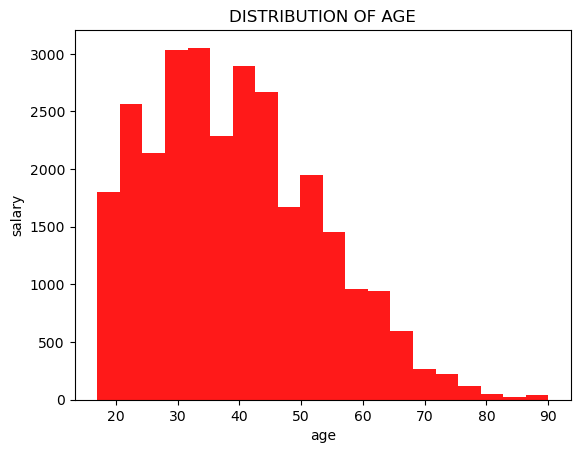

In [29]:
df['age'].hist(bins=20,alpha=0.9,color='red',grid=False)

plt.xlabel('age')
plt.ylabel('salary')
plt.title('DISTRIBUTION OF AGE')


Text(0.5, 1.0, 'DISTRIBUTION OF WORK CLASS')

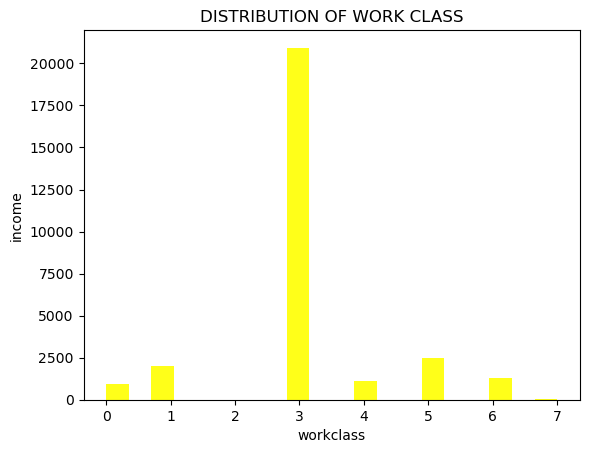

In [30]:
df['workclass'].hist(bins=20,alpha=0.9,color='yellow',grid=False)

plt.xlabel('workclass')
plt.ylabel('income')
plt.title('DISTRIBUTION OF WORK CLASS')


<AxesSubplot:>

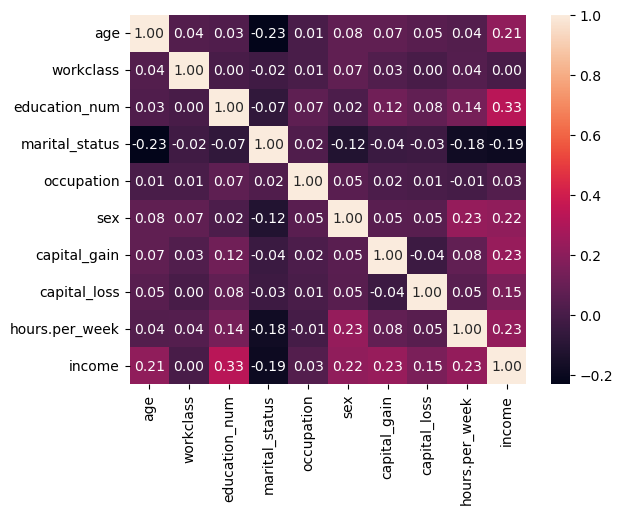

In [31]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")


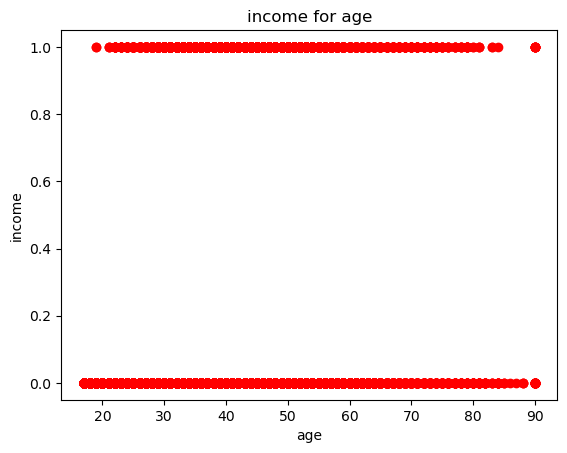

In [33]:
plt.xlabel("age")
plt.ylabel("income")
plt.title("income for age")
plt.scatter(df['age'],df['income'],color='red')

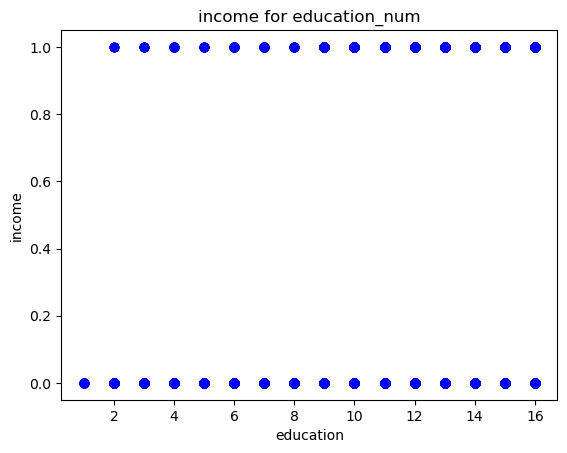

In [34]:
plt.xlabel("education")
plt.ylabel("income")
plt.title("income for education_num")
plt.scatter(df['education_num'],df['income'],color='blue')

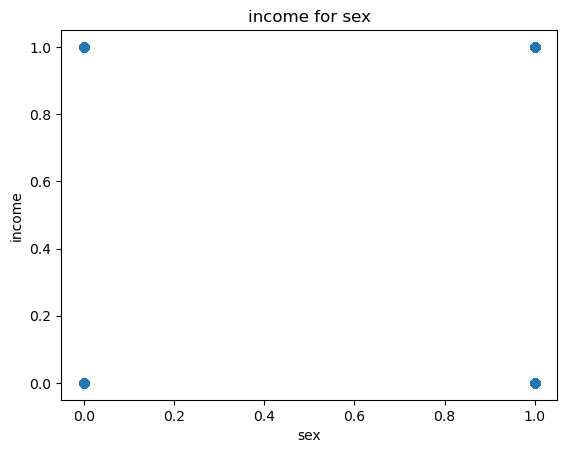

In [35]:
plt.xlabel("sex")
plt.ylabel("income")
plt.title("income for sex")
plt.scatter(df['sex'],df['income'])

In [36]:
#the outliers
data=df.age
mean= np.mean(data)
std=np.std(data)

threshold=3
outliers=[]
for x in data:
    z_score = (x - mean)/ std
    if abs(z_score)>threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers: ",outliers)
        

Mean:  39.30848141322113

Standard deviation:  13.69590661332667

Outliers:  [90, 82, 83, 81, 90, 81, 90, 90, 83, 90, 90, 90, 90, 90, 81, 90, 81, 90, 90, 81, 90, 88, 90, 90, 90, 82, 81, 83, 90, 81, 90, 90, 84, 90, 81, 83, 84, 81, 85, 82, 84, 90, 84, 90, 90, 90, 82, 81, 90, 84, 81, 82, 90, 84, 90, 84, 90, 83, 81, 90, 90, 90, 81, 83, 82, 90, 90, 90, 82, 85, 90, 81, 82, 88, 90, 82, 88, 84, 86, 90, 82, 81, 90, 81, 84, 84, 90, 81, 81, 81, 87, 90, 82, 90, 85, 82, 81]


Text(0.5, 1.0, 'EDUCATION')

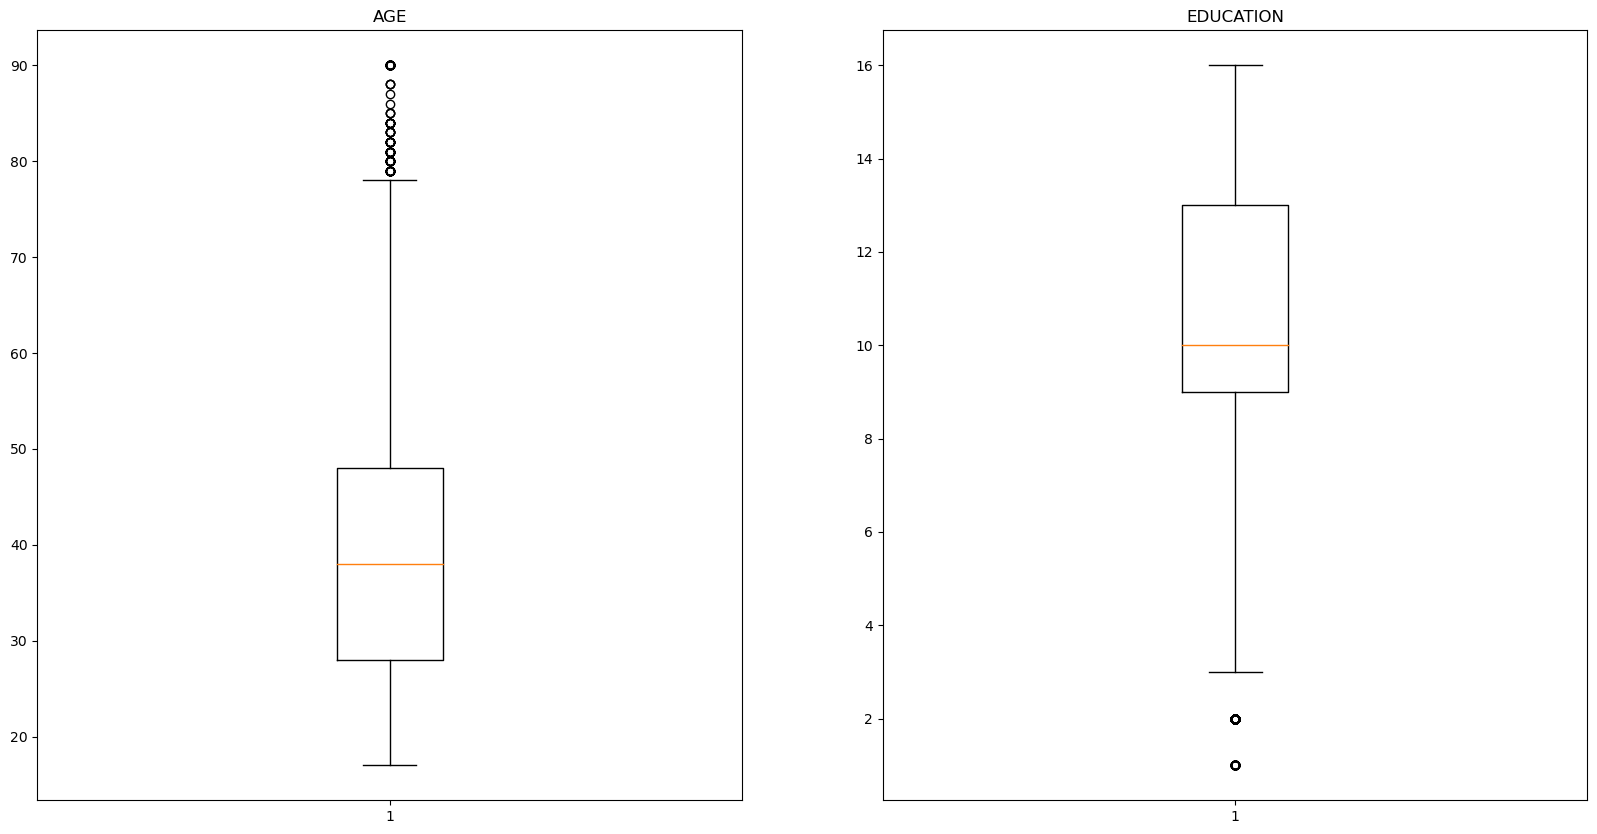

In [37]:
fig,z=plt.subplots(1,2,figsize=(20,10))
z[0].boxplot(df['age'])
z[0].set_title('AGE')
z[1].boxplot(df['education_num'])
z[1].set_title('EDUCATION')



In [38]:
def handle_outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    return lower_limit, upper_limit

In [39]:
l,u=handle_outlier(df['age'])
df.drop(df[(df.age < l) | (df.age > u)].index,inplace=True)


In [40]:
l,u=handle_outlier(df['education_num'])
df.drop(df[(df.education_num < l) | (df.education_num > u)].index,inplace=True)


Text(0.5, 1.0, 'EDUCATION')

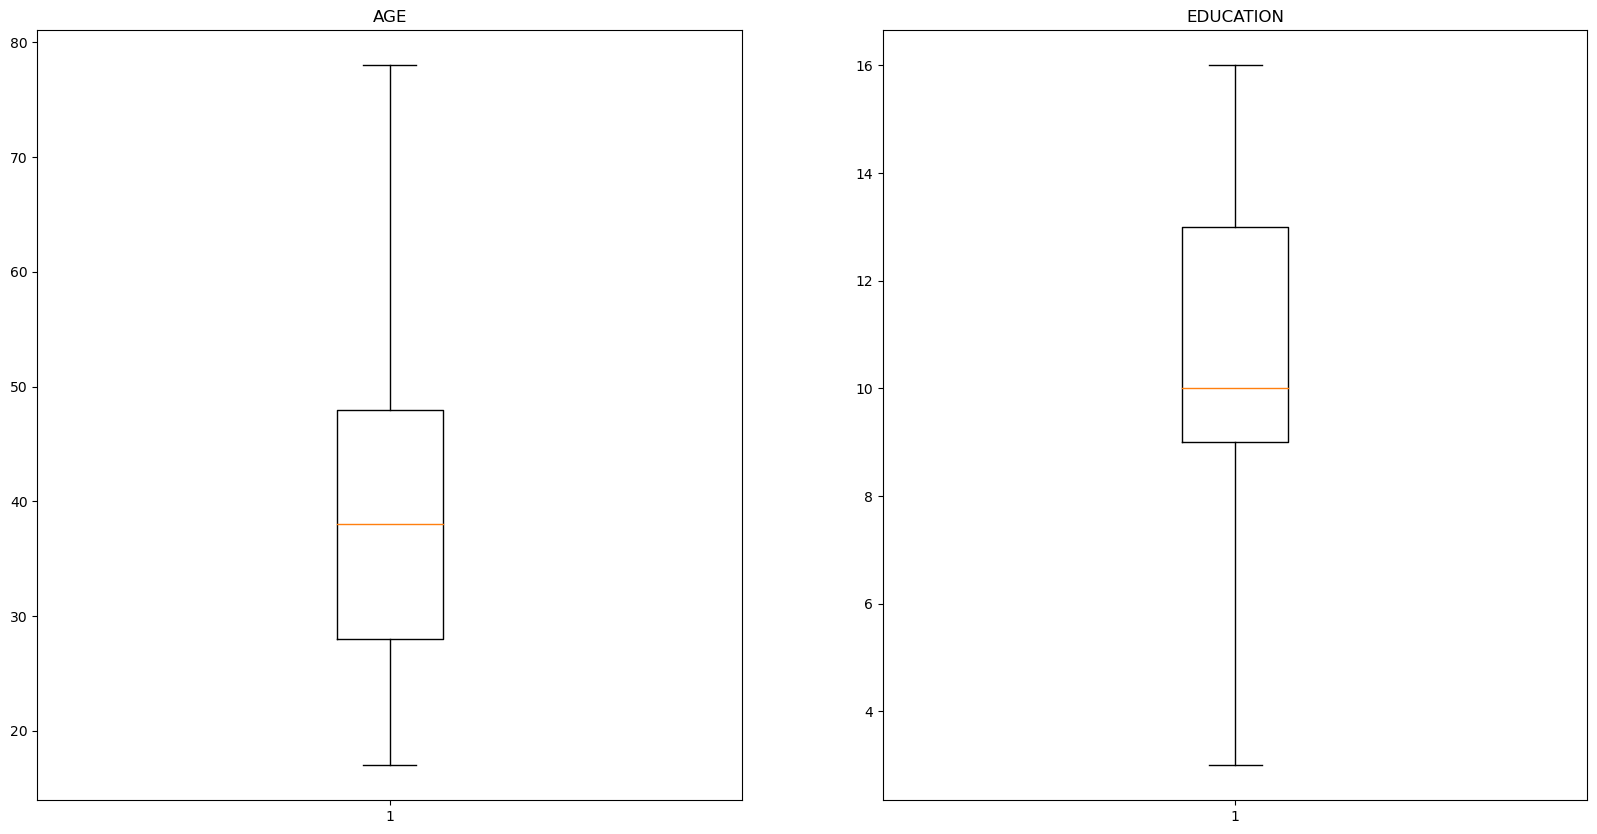

In [41]:
fig,z=plt.subplots(1,2,figsize=(20,10))
z[0].boxplot(df['age'])
z[0].set_title('AGE')
z[1].boxplot(df['education_num'])
z[1].set_title('EDUCATION')